# WeatherPy
----

#### Observations
* Temperature is the only parameter that has correlation to latitude
* There is a positive corelation between weather and latitude in the southern hemisphere
    * In the southern hemisphere, the temperature increases with latitude
* Cloudiness has little to no correlation to latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=7d2db04f7012d9be63cf0f40fb9de72b'

In [11]:
# weather_response = requests.get(target_url)
# weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 55.7522,
            "lon": 37.6156
        },
        "country": "RU",
        "id": 524901,
        "name": "Moscow",
        "population": 0,
        "sunrise": 1627435644,
        "sunset": 1627494266,
        "timezone": 10800
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 69
            },
            "dt": 1627452000,
            "dt_txt": "2021-07-28 06:00:00",
            "main": {
                "feels_like": 293.9,
                "grnd_level": 998,
                "humidity": 51,
                "pressure": 1015,
                "sea_level": 1015,
                "temp": 294.39,
                "temp_kf": -3.09,
                "temp_max": 297.48,
                "temp_min": 294.39
            },
            "pop": 0.02,
            "sys": {
                "pod": "d"
            },
            "visibility": 10000,
            "weather": [
                {

In [4]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
print("----------------------------"
         "Data Retrieval Complete"
       "---------------------------")

Processing record 1 of Set 1 | jiaozuo
Processing record 2 of Set 1 | mount isa
Processing record 3 of Set 1 | mar del plata
Processing record 4 of Set 1 | ostrovnoy
Processing record 5 of Set 1 | igarka
Processing record 6 of Set 1 | east london
Processing record 7 of Set 1 | ugoofaaru
Processing record 8 of Set 1 | grindavik
Processing record 9 of Set 1 | san quintin
Record not found
Processing record 10 of Set 1 | avarua
Processing record 11 of Set 1 | mataura
Processing record 12 of Set 1 | arraial do cabo
Processing record 13 of Set 1 | ushuaia
Processing record 14 of Set 1 | zhigansk
Processing record 15 of Set 1 | port keats
Record not found
Processing record 16 of Set 1 | bambous virieux
Processing record 17 of Set 1 | luderitz
Processing record 18 of Set 1 | kapaa
Processing record 19 of Set 1 | hilo
Processing record 20 of Set 1 | jamestown
Processing record 21 of Set 1 | provideniya
Record not found
Processing record 22 of Set 1 | maarianhamina
Processing record 23 of Set 1 

Processing record 191 of Set 1 | sambava
Processing record 192 of Set 1 | tuktoyaktuk
Processing record 193 of Set 1 | mlonggo
Processing record 194 of Set 1 | constitucion
Processing record 195 of Set 1 | saint-philippe
Processing record 196 of Set 1 | namibe
Processing record 197 of Set 1 | vila velha
Processing record 198 of Set 1 | ixtapa
Processing record 199 of Set 1 | mongoumba
Processing record 200 of Set 1 | haines junction
Processing record 201 of Set 1 | singaraja
Processing record 202 of Set 1 | shimanovsk
Record not found
Processing record 203 of Set 1 | edson
Processing record 204 of Set 1 | ogaminana
Processing record 205 of Set 1 | tessaoua
Processing record 206 of Set 1 | orlik
Processing record 207 of Set 1 | dingle
Processing record 208 of Set 1 | krasnoselkup
Processing record 209 of Set 1 | iqaluit
Processing record 210 of Set 1 | koungou
Processing record 211 of Set 1 | shanghai
Processing record 212 of Set 1 | kenai
Processing record 213 of Set 1 | hammerfest
Rec

Processing record 379 of Set 1 | salcininkai
Processing record 380 of Set 1 | suicheng
Processing record 381 of Set 1 | komsomolskiy
Processing record 382 of Set 1 | bardsir
Processing record 383 of Set 1 | newtownards
Processing record 384 of Set 1 | riyadh
Processing record 385 of Set 1 | margate
Processing record 386 of Set 1 | olinda
Processing record 387 of Set 1 | garmsar
Processing record 388 of Set 1 | mount gambier
Processing record 389 of Set 1 | alghero
Processing record 390 of Set 1 | puerto madryn
Processing record 391 of Set 1 | cap-chat
Processing record 392 of Set 1 | talaya
Processing record 393 of Set 1 | zhanaozen
Processing record 394 of Set 1 | qaqortoq
Processing record 395 of Set 1 | warmbad
Processing record 396 of Set 1 | santa marta
Processing record 397 of Set 1 | jalu
Processing record 398 of Set 1 | jumla
Processing record 399 of Set 1 | hirara
Processing record 400 of Set 1 | bilma
Processing record 401 of Set 1 | visalia
Processing record 402 of Set 1 | a

Processing record 567 of Set 1 | mmabatho
Processing record 568 of Set 1 | smidovich
Processing record 569 of Set 1 | yerbogachen
Processing record 570 of Set 1 | yeppoon
Processing record 571 of Set 1 | esna
Processing record 572 of Set 1 | bereda
----------------------------Data Retrieval Complete---------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp (F)":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)

In [6]:
# Export the City_Data into a csv
weather_data.to_csv(r'output_data\my_weather_data.csv')
weather_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Jiaozuo,35.2397,113.2331,80.85,78,100,7.38,CN,1627473600
1,Mount Isa,-20.7333,139.5000,75.79,27,12,4.70,AU,1627473600
2,Mar del Plata,-38.0023,-57.5575,42.58,65,80,25.72,AR,1627473600
3,Ostrovnoy,68.0531,39.5131,48.38,83,99,9.98,RU,1627473600
4,Igarka,67.4667,86.5833,55.33,79,100,9.19,RU,1627473600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.describe()


,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,19.214154,16.403679,71.259650,67.664336,52.199301,8.512343,1.627474e+09
std,33.394169,91.870190,15.255798,22.689079,37.409816,5.371897,0.000000e+00
min,-54.800000,-175.200000,33.100000,6.000000,0.000000,0.180000,1.627474e+09
25%,-9.035675,-64.350300,61.195000,56.000000,13.000000,4.625000,1.627474e+09
50%,24.585500,18.508400,73.970000,73.000000,55.000000,7.390000,1.627474e+09
75%,47.674500,96.972300,81.165000,85.000000,91.250000,11.620000,1.627474e+09
max,78.218600,179.316700,113.770000,100.000000,100.000000,29.730000,1.627474e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
today_date = pd.to_datetime('today').date().strftime('%m/%d/%y')

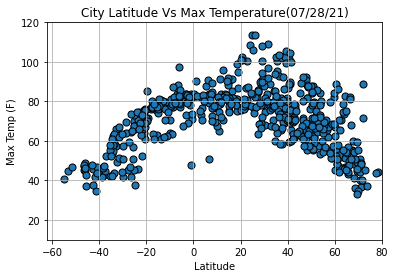

In [9]:
weather_data.plot.scatter(x="Latitude", 
                          y="Max Temp (F)", 
                          xlim = (-62, 80), 
                          ylim= (10, 120),
                          s= 50, 
                          grid = True, 
                          edgecolor = "black", 
                          figsize=(6,4), 
                          title= f"City Latitude Vs Max Temperature({today_date})")
plt.show()

### Conclusion:
Surprisingly, temperatures are not the hottest arond the equator. Temperatures peak around -40 latitude and trail off as latitude increases.

## Latitude vs. Humidity Plot

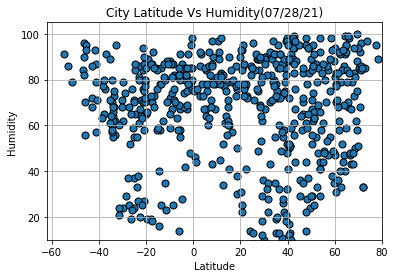

In [10]:
weather_data.plot.scatter(x="Latitude", 
                          y="Humidity", 
                          xlim = (-62, 80), 
                          ylim= (10, 105),
                          s= 50, 
                          grid = True, 
                          edgecolor = "black", 
                          figsize=(6,4), 
                          title= f"City Latitude Vs Humidity({today_date})")
plt.show()

### Conclusion:
Humidity is clustered above 60 and does not seem to be affected by latitude.

## Latitude vs. Cloudiness Plot

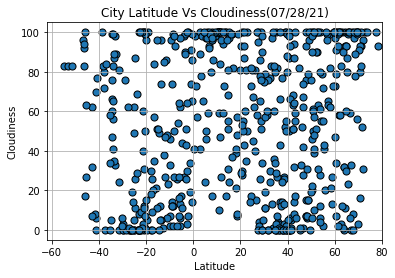

In [11]:
weather_data.plot.scatter(x="Latitude", 
                          y="Cloudiness", 
                          xlim = (-62, 80), 
                          ylim= (-5, 105),
                          s= 50, 
                          grid = True, 
                          edgecolor = "black", 
                          figsize=(6,4), 
                          title= f"City Latitude Vs Cloudiness({today_date})")
plt.show()

### Conclusion:
Cloudiness is scattered evenly across latitudes

## Latitude vs. Wind Speed Plot

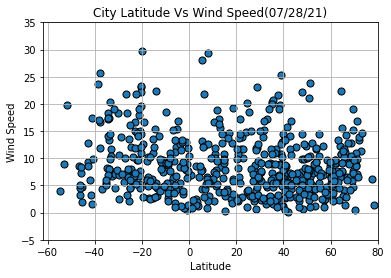

In [43]:
weather_data.plot.scatter(x="Latitude", 
                          y="Wind Speed", 
                          xlim = (-62, 80), 
                          ylim= (-5, 35),
                          s= 50, 
                          grid = True, 
                          edgecolor = "black", 
                          figsize=(6,4), 
                          title= f"City Latitude Vs Wind Speed({today_date})")
plt.show()

### Conclusion:
Wind speeds are fairly low across all latitudes.

## Linear Regression

In [37]:
 def plot_linear_regression(x_values, y_values,y_label, plt_title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(plt_title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]


The r-squared is: -0.5955001816035708


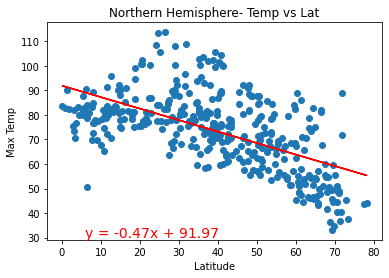

In [39]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp (F)"]
plot_linear_regression(x_values,y_values,'Max Temp',"Northern Hemisphere- Temp vs Lat",(6,30))

plt.show()

### Conclusion
The temperature in the northern hemisphere are moderately correlated. It's not the strongest relationship,however, temperatures decrease as latitude moves from the equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8288028521104682


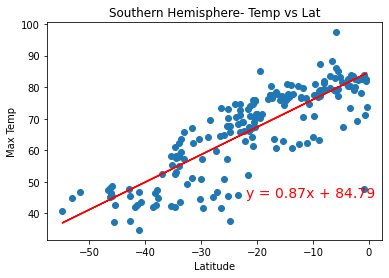

In [40]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp (F)"]
plot_linear_regression(x_values,y_values,'Max Temp',"Southern Hemisphere- Temp vs Lat",(-22,45))


### Conclusion:
Given the high r value, we know that temp and latitude are strongly related. Temperatures increase as latitudes move closer to the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.012472067612565729


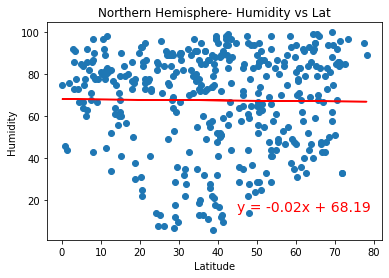

In [41]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',"Northern Hemisphere- Humidity vs Lat",(45,15))


### Conclusion:
This Linear Regression has a r value close to zero. This tells us that there is no correlation between humidity and latitude in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011487845387494783


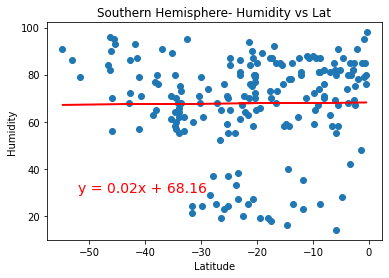

In [42]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',"Southern Hemisphere- Humidity vs Lat",(-52,30))


### Conclusion:
This Linear Regression has a r value close to zero. This tells us that there is no correlation between humidity and latitude in the Northern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04710568583089235


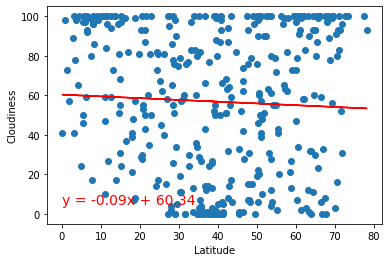

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(0,5))


### Conclusion:
This Linear Regression has a r value close to zero. This tells us that there is no correlation between cloudiness and latitude in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08455413762095093


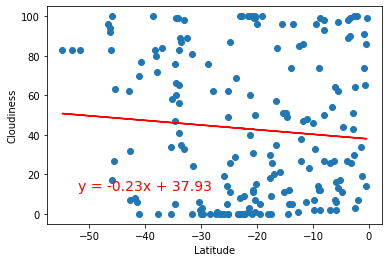

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-52,12))


### Conclusion:
This Linear Regression has a r value is very small. This tells us that there is no correlation between cloudiness and latitude in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0252937700432533


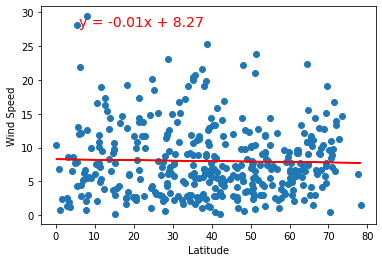

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,28))


### Conclusion:
This Linear Regression has a r value close to zero. This tells us that there is no correlation between wind speed and latitude in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14871687107885712


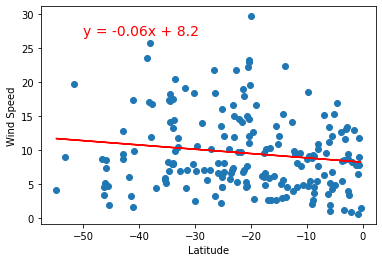

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,27))


### Conclusion:
This Linear Regression has a very small r-value. This tells us that there is no correlation between wind speed and latitude in the Southern Hemisphere